# Predicting Business Profitability: Analyzing the Impact of R&D, Administration, and Marketing Spend

# Introduction:
* In today's competitive business environment, companies invest in various sectors such as Research & Development (R&D), Administration, and Marketing to maximize their profitability. Understanding the impact of these expenditures on business success is crucial for making informed financial decisions.

* This project analyzes the 50 Startups Dataset, which contains financial data of 50 startups across different states. The dataset includes key factors such as R&D Spend, Administration Costs, and Marketing Spend, along with the Profit generated by each startup. The goal is to explore relationships between these factors and build a predictive model to estimate Profit based on company expenditures.

* By performing exploratory data analysis (EDA) and applying multiple linear regression, this study aims to identify which factors contribute the most to a startup’s profitability. The insights gained can help businesses optimize their spending strategies for better financial outcomes.

In [4]:
# Importing the Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [5]:
import numpy as np
print(np.__version__)


1.26.4


In [6]:
# Dataset Loading:
a=pd.read_csv("50Startups (1).csv")
a

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Data Understanding

In [8]:
a.shape

(50, 5)

In [9]:
a.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [10]:
a.head(2)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


In [11]:
a.tail(2)

,R&D Spend,Administration,Marketing Spend,State,Profit
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [12]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


# Initial insights from inspection:
* 50 Rows and 5 features
* 4 are in float and 1 is in object
* No null values
* Problem identification: Multiple Linear Regression (Profit is a continuous variable and dataset has 4 independent and 1 dependent variable)

In [14]:
a.describe() # Statistical summary

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# Statistical Insights on Startup Investments and Profitability:
* There is a wide range in R&D investments, with some startups spending nothing while others invest heavily. The high standard deviation indicates large variations in spending patterns, which may significantly impact profitability.
* Unlike R&D, all startups have administration costs. The variation is moderate, indicating that most companies spend a similar amount on administrative expenses. However, this cost may not have a major impact on profit compared to R&D.
* Some companies do not invest in marketing at all, while others allocate a huge budget. The high standard deviation suggests a large disparity in marketing strategies among startups. Companies with higher marketing spend might have higher visibility and revenue generation.
 * The profit distribution varies significantly across startups. The higher quartile (75%) shows that successful startups earn nearly $140,000 or more, while others make much lower profits.
# Business Impact & Recommendations
* R&D Spend seems to be a key factor in profitability as some startups invest heavily, while others don’t. Startups investing more in R&D may have a competitive advantage.
* Marketing investment shows high variation, indicating different strategies across companies. Higher marketing spending could lead to higher profits.
* Administration costs remain relatively stable, suggesting they may not be a major profit-driving factor.
* Startups with zero R&D or Marketing spend might struggle to generate high profits, based on observed trends.

# Data Inspection

In [17]:
a.isnull().sum() # check the missing values

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [18]:
a.duplicated().sum()

0

In [19]:
# Check the Outliers

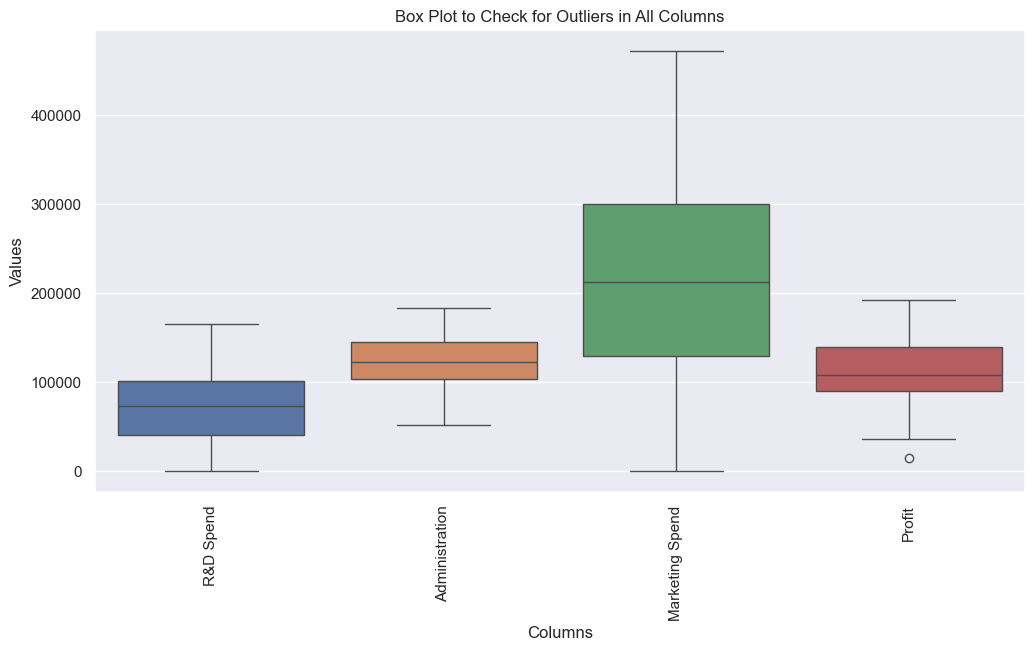

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=a)
plt.title('Box Plot to Check for Outliers in All Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.show()

In [21]:
a.corr(numeric_only=True) #To check the correlation between the variables to identify redundant and neccessary columns.

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


* No Null Values
* No Duplicated Rows
* No Redundant Columns
* No Outliers

# Encoding

In [24]:
b=a.copy()

In [25]:
b['State'].value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

In [26]:
b['State']=b['State'].astype('category')
b['State']=b['State'].cat.codes

In [27]:
b

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


In [28]:
# Data Visualization

In [29]:
# Univariant Analysis

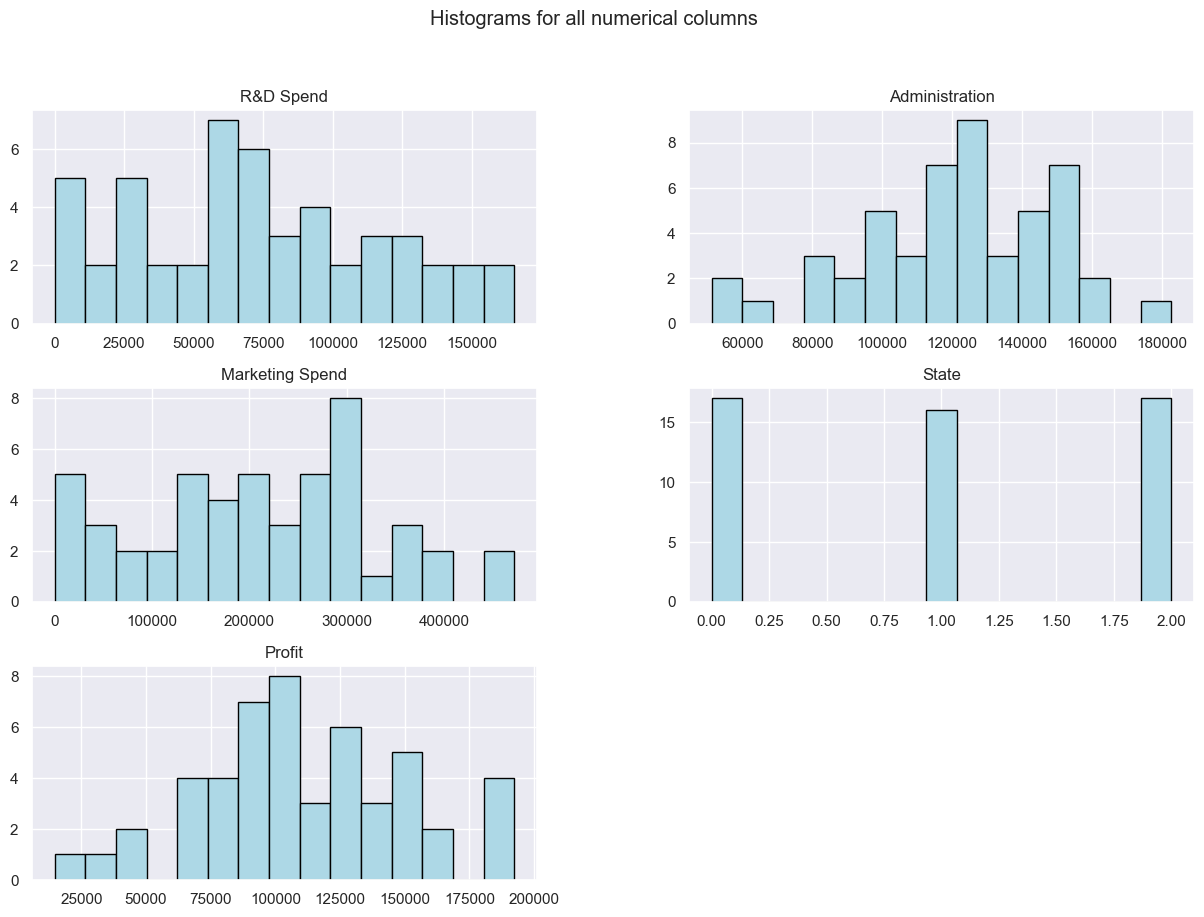

In [30]:
b.hist(bins=15, figsize=(15, 10), color='lightblue', edgecolor='black')
plt.suptitle('Histograms for all numerical columns')
plt.show()

# Insights from Univariate Analysis
* Univariate analysis examines the distribution of each variable separately to understand patterns, variations, and potential anomalies. Here are the insights based on the provided histograms:
* Investing in R&D could be a major factor influencing profit, as companies spending more tend to see higher returns.
* Since adminiSince the distribution is even, state-wise location may not be a key factor affecting profit in this dataset.stration expenses are stable across startups, they may not have a significant impact on profit variation.
* Startups with higher marketing spend may experience better visibility and sales, which could directly impact profitability.
* Startups with higher R&D and marketing investments tend to fall in the higher profit range, while those with zero R&D or marketing are in the lower range.
# R&D and Marketing Spend have a strong impact on Profit, as seen from their skewed distributions.
# Administration costs are stable and may not be a major factor influencing profit.
#  Startups investing less in R&D and marketing tend to have lower profits, as indicated by the distribution.

In [32]:
# Bivariate Analysis:

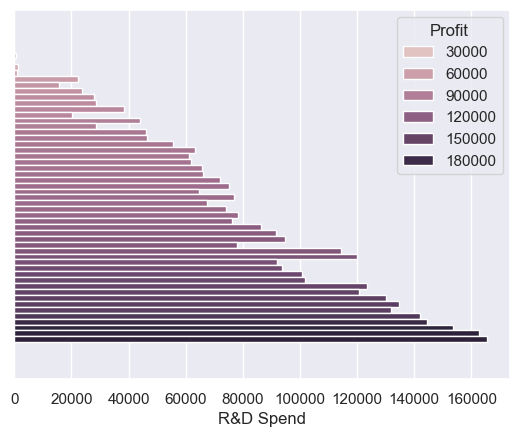

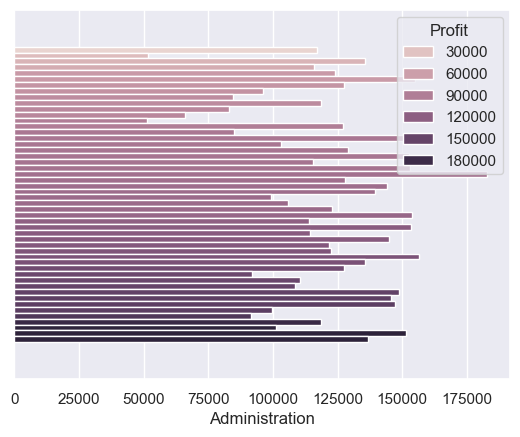

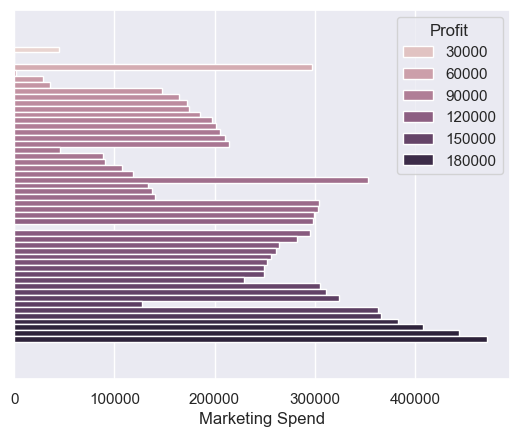

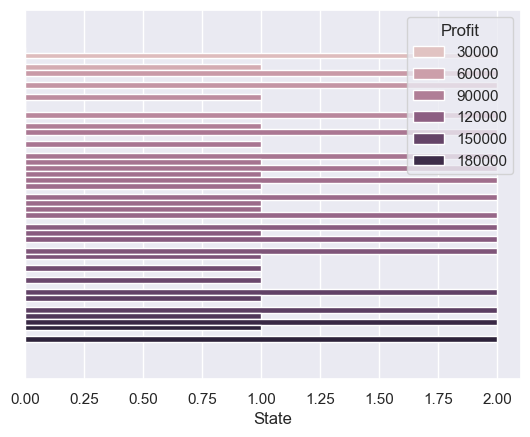

In [33]:
for i, predictor in enumerate(b.drop(columns=['Profit'])):
    plt.figure()
    sns.barplot(data=b,x=predictor,hue='Profit')

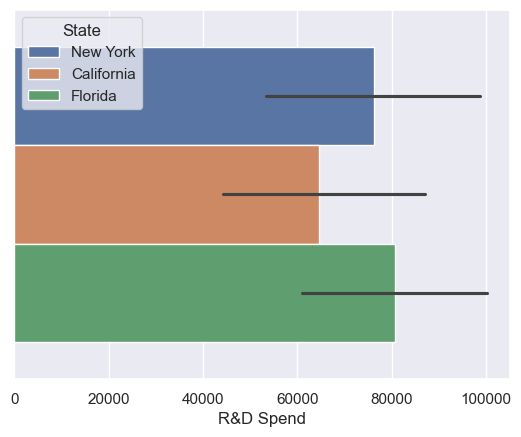

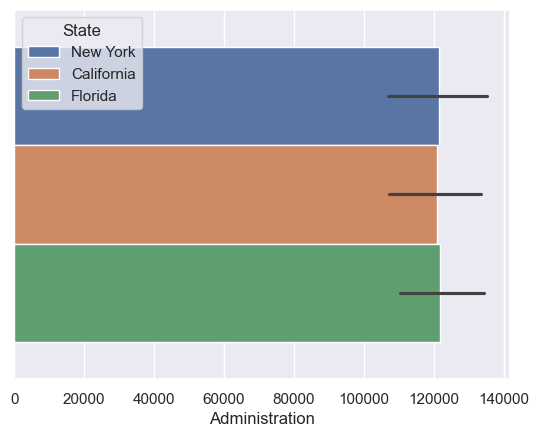

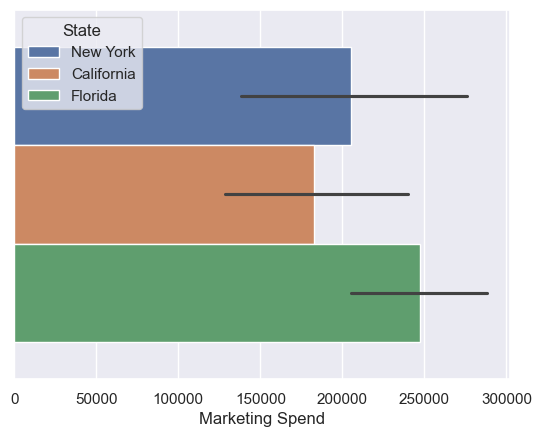

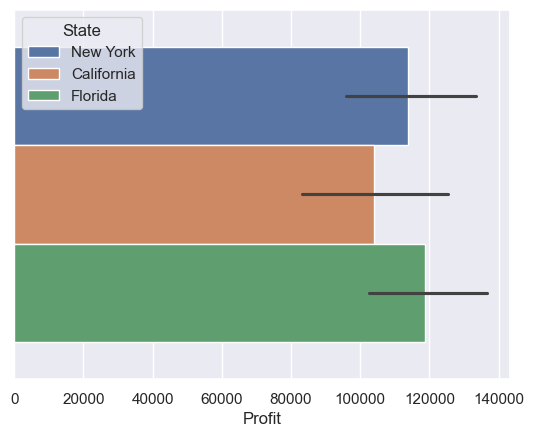

In [34]:
for i, predictor in enumerate(a.drop(columns=['State'])):
    plt.figure()
    sns.barplot(data=a,x=predictor,hue='State')

# Bivariate Analysis Insights
# R&D and Marketing investments are the key profit drivers, while administration costs remain uniform across states.
# Administration expenses are evenly distributed across states, showing no regional influence.
# Startups in Florida tend to be more profitable, indicating potential state-specific advantages.

In [36]:
# Correlation:

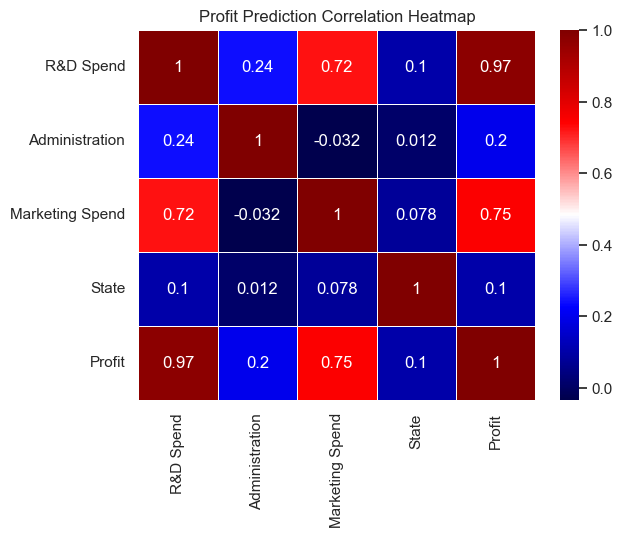

In [37]:
sns.heatmap(
    b.corr(numeric_only=True),
    linewidth=0.5,
    cmap='seismic',
    annot=True
).set_title('Profit Prediction Correlation Heatmap')

plt.savefig('C:\\Users\\R Lavanya\\Downloads\\New folder', bbox_inches='tight')

* >0.7 -Highly correlated

* 0.3-0.7 - Moderate Correlated

*  <0.3 - Low correlation

*  <1-negative correlation

*  >1-positive correlation

# Insights

# Heatmap Insights
A heatmap visualizes correlations between different numerical variables, helping identify strong or weak relationships.
* R&D Spend and Profit were highly Correlated.
* Marketing Spend and Profit were moderately correlated
* Administration and profit were low correlated
# R&D Spend is the strongest predictor of profit.
# Marketing Spend contributes to profit but is not the primary factor.
# Administration expenses do not significantly impact profit.

* Dropping Administration reduces noise and enhances model performance.
* Scaling ensures features are on the same scale for better learning.

In [41]:
b.head(2)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.80,471784.10,2,192261.83
1,162597.7,151377.59,443898.53,0,191792.06


In [42]:
c=b.drop('Administration',axis=1)
c.head(2)

,R&D Spend,Marketing Spend,State,Profit
0,165349.2,471784.10,2,192261.83
1,162597.7,443898.53,0,191792.06


# Feature Selection

In [44]:
# we can only do with independent variable
# split the data into independent variable and dependent variable
x = c.iloc[:,0:-1]
y = c['Profit']

In [45]:
x.head(3)

,R&D Spend,Marketing Spend,State
0,165349.20,471784.10,2
1,162597.70,443898.53,0
2,153441.51,407934.54,1


In [46]:
y.head(5)

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

# Feature Scaling - Standardization

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = sc.fit_transform(x)
pd.DataFrame(sc_x)

,0,1,2
0,2.016411,2.153943,1.212678
1,1.955860,1.923600,-1.212678
2,1.754364,1.626528,0.000000
3,1.554784,1.422210,1.212678
4,1.504937,1.281528,0.000000
5,1.279800,1.254210,1.212678
6,1.340066,-0.688150,-1.212678
7,1.245057,0.932186,0.000000
8,1.030369,0.830887,1.212678
9,1.091819,0.776107,-1.212678


# VIF - Variance Inflation Factor - to check multicollinearity
* A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. Multicollinearity exists when there is a correlation between multiple independent variables in a multiple regression model.

In [50]:
variable = sc_x
variable.shape

(50, 3)

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = sc_x

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i ) for i in range(variable.shape[1])]

vif['Features'] = x.columns

In [52]:
vif

,Variance Inflation Factor,Features
0,2.113697,R&D Spend
1,2.103221,Marketing Spend
2,1.011088,State


* All the vif values were less than 5, so no need of droping any column
* vif 1-Not correlated
* vif between 1 and 5 moderately correlated
* vif more than 5 highly correlated
# No multicollinearity

#  Model Selection & Training
* Split data (Train-Test Split, 80-20 or 70-30)
* Choose the model based on the problem
* Train the model on the training dataset

# Split the data into training and test for building the model and for prediction

In [56]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

In [57]:
# Assuming x and y are your independent and dependent variables respectively
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=100)

In [58]:
# Add a constant to the model for the intercept term
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

# Building Linear Regression Model

In [60]:
# Fit the OLS regression model
reg_model = OLS(y_train, x_train).fit()  # Use OLS directly from statsmodels.regression.linear_model

In [61]:
# Print the model summary
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     293.7
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           2.34e-25
Time:                        17:10:14   Log-Likelihood:                -414.86
No. Observations:                  40   AIC:                             837.7
Df Residuals:                      36   BIC:                             844.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.967e+04   3152.967     15.754      0.000    4.33e+04    5.61e+04
R&D Spend           0.8015      0.043     18.667      0.000       0.714       0.889
Marketing Spend     0.0237      0.015      1.533      0.134      -0.008       0.055
State           -1301.7169   1577.837     -0.825      0.415   -4501.719    1898.286
==============================================================================
Omnibus:                        0.045   Durbin-Watson:                   2.139
Prob(Omnibus):                  0.978   Jarque-Bera (JB):                0.183
Skew:                           0.070   Prob(JB):                        0.913
Kurtosis:                       2.700   Cond. No.                     6.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
#R2>=AdjR2-satisfied
#P-value>0.05-Autocorrelated,drop that particular column
#Durbin watsan ranges between o to 4-satisfied

# Model Performance
* R-squared = 0.961 → The model explains 96.1% of the variance in Profit, which is very strong.
* Adj. R-squared = 0.957 → Adjusted for the number of predictors, still high, indicating a well-fitted model.
* Interpretation: model has high explanatory power, meaning it can predict Profit effectively.
# Feature Significance (P-values & Coefficients)
* R&D Spend is the most significant and strongest predictor of profit (P < 0.05).
* Marketing Spend has a small positive effect but is not statistically significant (P = 0.134).
* State has no meaningful impact on Profit (P = 0.415), confirming previous insights.
# Drop ‘State’ and 'Marketing Spend' from the model as it does not contribute significantly.

In [64]:
new_data = c.drop(['Marketing Spend', 'State'], axis=1)

In [65]:
import statsmodels.api as sm
X = new_data[['R&D Spend']]  # Only keeping R&D Spend
y = new_data['Profit']
X = sm.add_constant(X)  # Adding intercept
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           3.50e-32
Time:                        17:10:15   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.0

# Model Fit and Significance
* R-squared = 0.947 → 94.7% of the variation in Profit is explained by R&D Spend.
* Adjusted R-squared = 0.945 → Very high, indicating a strong model.
* F-statistic = 849.8 (p-value = 3.50e-32) → The model is statistically significant.
# Coefficients and Interpretation
* Intercept (const) = 49,030 → If R&D Spend is 0, the predicted profit is ₹49,030.
* R&D Spend Coefficient = 0.8543 → Every ₹1 increase in R&D Spend leads to an ₹0.85 increase in Profit.
* p-value for R&D Spend = 0.000 → Strongly significant, confirming that R&D Spend is highly correlated with Profit.
* Durbin-Watson (1.116) → Slight risk of autocorrelation (ideal is ~2).

In [67]:
x=x.drop(['Marketing Spend','State'],axis=1)
x.head(3)

,R&D Spend
0,165349.20
1,162597.70
2,153441.51


In [68]:
# Predict values of y using the trained model for the test set
y_pred_train = reg_model.predict(x_train)  # Predictions on the training set
y_pred_test = reg_model.predict(x_test)    # Predictions on the test set

In [69]:
# You can now use y_pred_train and y_pred_test for further analysis or evaluation
print(f"Predictions on training set: {y_pred_train[:5]}")  # Displaying first 5 predictions
print(f"Predictions on test set: {y_pred_test[:5]}")  # Displaying first 5 predictions

Predictions on training set: 0     190792.191507
11    136287.482403
18    128905.893720
45     47915.126133
38     67678.402433
dtype: float64
Predictions on test set: 6     160598.299379
36     76116.584394
37     89669.365082
28    104114.555665
43     60339.449042
dtype: float64


In [70]:
# Validate the actual price of the test data and predicted price

from sklearn.metrics import r2_score
r2_score(y_test, y_pred_test)

0.8962777484046761

In [71]:
r2_score(y_train, y_pred_train)

0.9607492827062777

In [72]:
## Adj. R-squared (uncentered):	0.964
## All variable is statically significant (p <= 0.05) 
# task - please drop "Avg. Area Number of Bedrooms" and then follow the same approach
# check underfitting or overfitting problem - no bias and variance found
## Assumptions

# 1) Linearity - Satisfied
# 2) Normality of Residuals- Satisfied
# 3) Homoscedasticity - Satisfied (there is no outlier and residual is normaly distributed)
# 4) No autocorrelation - Satisfied
# 5) No or little Multicollinearity - satisfied
# 6) No endogenity problem - satisfied 

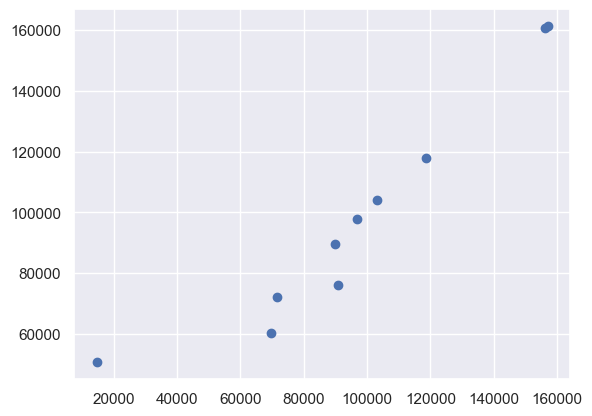

In [73]:
# Check linearity

plt.scatter(y_test, y_pred_test)

* The points follow a clear upward trend, indicating a strong linear relationship between the independent variable(s) and profit.

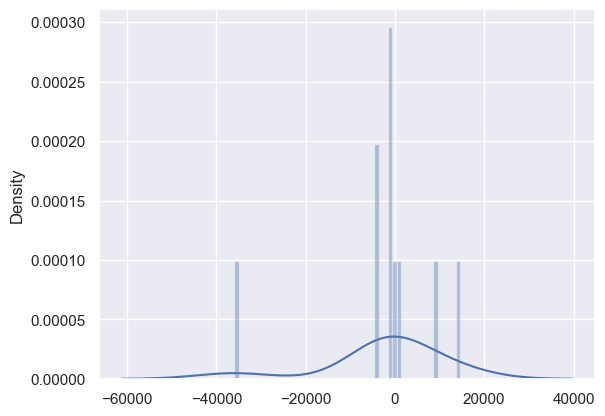

In [75]:
# Normality of Residual

sns.distplot((y_test - y_pred_test), bins=50)
plt.show()

# If residuals increase/decrease with profit, there may be heteroscedasticity (unequal variance), which violates OLS assumptions.

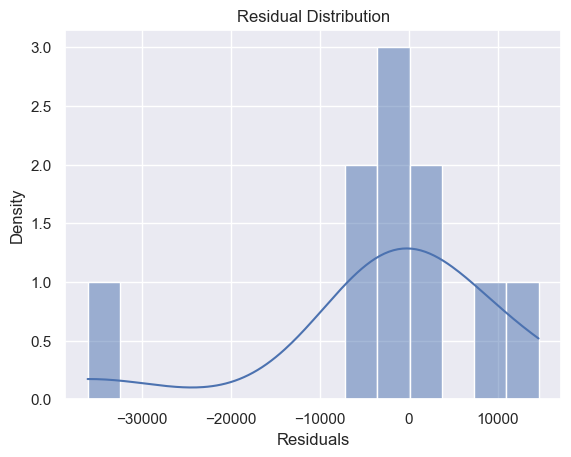

In [77]:
residuals = y_test - y_pred_test
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Residual Distribution")
plt.show()

# Residuals are not perfectly centered around zero:

* Ideally, residuals should be symmetrically distributed around zero with a bell-shaped curve.
Here, we see some skewness, indicating that the model might have a bias in predicting some values.
Presence of extreme residuals (outliers):
* There are residuals far from zero (both negative and positive).
This suggests possible heteroscedasticity (non-constant variance) or the presence of outliers affecting predictions.
* Possible Non-Linearity:
The residuals should ideally form a normal distribution (bell curve).
If they don’t, it suggests that the relationship between the features and the target variable is not fully captured by the model.

In [79]:
import numpy as np
y_train = np.log(y_train)
y_test = np.log(y_test)


<Axes: ylabel='Profit'>

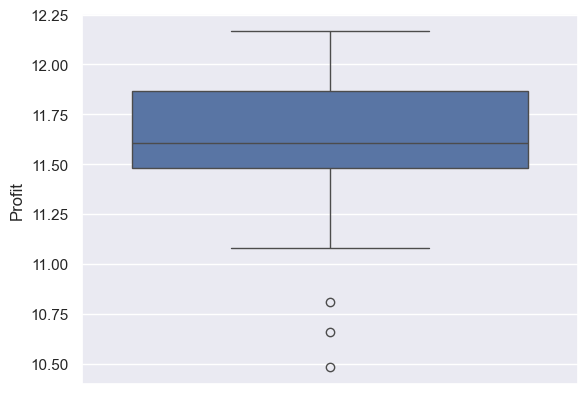

In [80]:
import seaborn as sns
sns.boxplot(y_train)

In [81]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for y_train
Q1 = y_train.quantile(0.25)
Q3 = y_train.quantile(0.75)

In [82]:
# Compute IQR
IQR = Q3 - Q1

In [83]:
# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [84]:
# Clip values within bounds
y_train = y_train.clip(lower=lower_bound, upper=upper_bound)
y_test = y_test.clip(lower=lower_bound, upper=upper_bound)

<Axes: ylabel='Profit'>

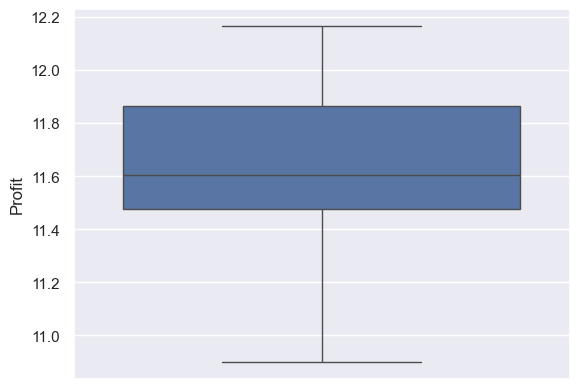

In [85]:
import seaborn as sns
sns.boxplot(y_train)

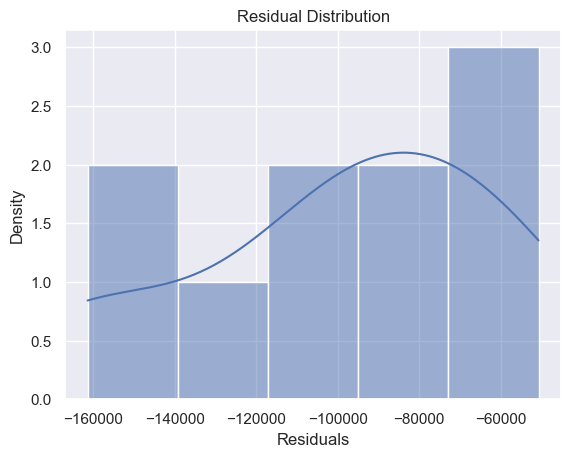

In [86]:
residuals = y_test - y_pred_test
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Residual Distribution")
plt.show()

Residuals are not normally distributed:

The shape suggests some skewness or a non-Gaussian pattern.
This could indicate heteroscedasticity (variance is not constant).

In [88]:
# Ridge regularization

In [89]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.3)
ridge.fit(x_train, y_train)
print("Ridge Model :", (ridge.coef_))

Ridge Model : [ 0.00000000e+00  7.30732106e-06  3.19814047e-08 -5.76823158e-03]


In [90]:
y_pred_train_ridge = ridge.predict(x_train)
y_pred_test_ridge = ridge.predict(x_test)

In [91]:
print("Training Accuracy :", r2_score(y_train, y_pred_train_ridge))
print()
print("Test Accuracy :", r2_score(y_test, y_pred_test_ridge))

Training Accuracy : 0.9488836665342554

Test Accuracy : 0.9388654024786345


In [92]:
# Lasso regularization

In [93]:
from sklearn.linear_model import Lasso 
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
print("Lasso Model :", (lasso.coef_))

Lasso Model : [ 0.00000000e+00  7.29864330e-06  3.29511805e-08 -0.00000000e+00]


In [94]:
y_pred_train_lasso = lasso.predict(x_train)
y_pred_test_lasso = lasso.predict(x_test)

In [95]:
print("Training Accuracy :", r2_score(y_train, y_pred_train_lasso))
print()
print("Test Accuracy :", r2_score(y_test, y_pred_test_lasso))

Training Accuracy : 0.9486876170215515

Test Accuracy : 0.9400059591285576


In [96]:
# Elastic Net

In [97]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=0.3, l1_ratio=0.1)
elastic.fit(x_train, y_train)

ElasticNet(alpha=0.3, l1_ratio=0.1)

In [98]:
y_pred_train_elastic = elastic.predict(x_train)
y_pred_test_elastic = elastic.predict(x_test)

In [99]:
print("Training Accuracy :", r2_score(y_train, y_pred_train_elastic))
print()
print("Test Accuracy :", r2_score(y_test, y_pred_test_elastic))

Training Accuracy : 0.9486876171006108

Test Accuracy : 0.9400076407700935


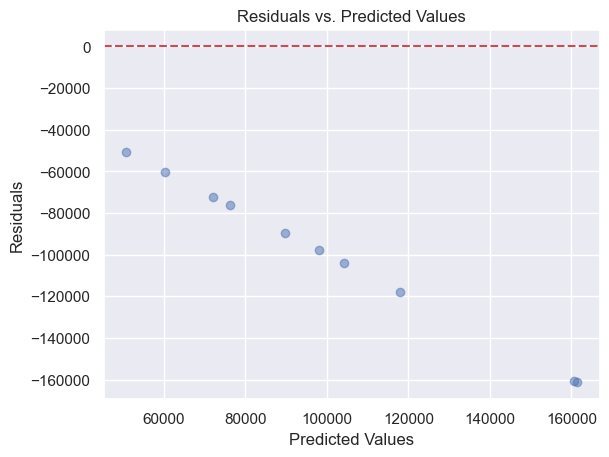

In [100]:
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()


* linear model is not capturing all relationships in the data.
# Decision Tree Algorithm

In [102]:
from sklearn.tree import DecisionTreeRegressor

# Initialize Decision Tree Model
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)

# Train the model using R&D Spend and log(profit)
dt_model.fit(x_train, y_train)

# Predict log(profit)
y_pred_train_log = dt_model.predict(x_train)
y_pred_test_log = dt_model.predict(x_test)


In [103]:
# Convert Predictions Back (Inverse Log Transform)
import numpy as np

# Convert log(profit) predictions back to normal profit scale
y_pred_train = np.exp(y_pred_train_log)
y_pred_test = np.exp(y_pred_test_log)


In [104]:
# Evaluate Performance
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Compare predictions in original profit scale
print("Train R2 Score:", r2_score(np.exp(y_train), y_pred_train))
print("Train RMSE:", mean_squared_error(np.exp(y_train), y_pred_train, squared=False))
print("Train MAE:", mean_absolute_error(np.exp(y_train), y_pred_train))

print("Test R2 Score:", r2_score(np.exp(y_test), y_pred_test))
print("Test RMSE:", mean_squared_error(np.exp(y_test), y_pred_test, squared=False))
print("Test MAE:", mean_absolute_error(np.exp(y_test), y_pred_test))

Train R2 Score: 0.9984922044547425
Train RMSE: 1453.7301602505036
Train MAE: 871.7548613569885
Test R2 Score: 0.9557711061604927
Test RMSE: 6902.428762047598
Test MAE: 5435.381603247804


* Train R² = 0.998 → Model fits training data almost perfectly
* Test R² = 0.955 → Very strong test performance
* Train RMSE (1453) vs. Test RMSE (6902) → Some gap, possible overfitting

# Tune Hyperparameters (Control Overfitting)

In [107]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)

# Train with best parameters
best_dt = grid_search.best_estimator_


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [108]:
y_pred_train = np.exp(best_dt.predict(x_train))
y_pred_test = np.exp(best_dt.predict(x_test))

print("Train R2:", r2_score(np.exp(y_train), y_pred_train))
print("Test R2:", r2_score(np.exp(y_test), y_pred_test))
print("Train RMSE:", mean_squared_error(np.exp(y_train), y_pred_train, squared=False))
print("Test RMSE:", mean_squared_error(np.exp(y_test), y_pred_test, squared=False))

Train R2: 0.9984922044547425
Test R2: 0.9557711061604927
Train RMSE: 1453.7301602505036
Test RMSE: 6902.428762047598


* Decision Tree model is still overfitting
* Use Random Forest

In [110]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(x_train, y_train)

y_pred_rf_train = rf_model.predict(x_train)
y_pred_rf_test = rf_model.predict(x_test)

print("Random Forest Train R2:", r2_score(y_train, y_pred_rf_train))
print("Random Forest Test R2:", r2_score(y_test, y_pred_rf_test))
print("Random Forest Train RMSE:", mean_squared_error(y_train, y_pred_rf_train, squared=False))
print("Random Forest Test RMSE:", mean_squared_error(y_test, y_pred_rf_test, squared=False))

Random Forest Train R2: 0.9916883408879487
Random Forest Test R2: 0.9647047770338144
Random Forest Train RMSE: 0.031003723104122017
Random Forest Test RMSE: 0.06094373875576546


 # Random Forest model significantly reduced overfitting compared to Decision Tree:
* Train R² = 0.991 → Slightly lower than before (good sign!)
* Test R² = 0.965 → Improved generalization
* Train RMSE = 0.031 vs. Test RMSE = 0.060 → Much smaller gap


# XG Boost

In [115]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

xgb_model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgb_model.fit(x_train, y_train)

y_pred_xgb_train = xgb_model.predict(x_train)
y_pred_xgb_test = xgb_model.predict(x_test)

print("XGBoost Train R2:", r2_score(y_train, y_pred_xgb_train))
print("XGBoost Test R2:", r2_score(y_test, y_pred_xgb_test))
print("XGBoost Train RMSE:", mean_squared_error(y_train, y_pred_xgb_train, squared=False))
print("XGBoost Test RMSE:", mean_squared_error(y_test, y_pred_xgb_test, squared=False))


XGBoost Train R2: 0.999985989065871
XGBoost Test R2: 0.946491910641791
XGBoost Train RMSE: 0.0012729271032757782
XGBoost Test RMSE: 0.07503793095762974


# Random Forest is performing well and is more balanced.

# Thank You!!!